In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry.polygon import Polygon
from h3 import h3 
from shapely.geometry import shape
from shapely.geometry import Point

In [2]:
#
df=pd.read_csv('taxi_19_may_es.csv', parse_dates=['Trip Start Timestamp','Trip End Timestamp'])
df=df.drop('Unnamed: 0',axis=1)
df['Trips Total']=df[['Fare','Tips','Tolls','Extras']].sum(axis=1)

In [3]:
#kann man ausfuehren, muss man aber nicht
df['date']=df['Trip Start Timestamp'].apply(lambda d: pd.to_datetime(d).floor('d'))
df['hour']=df['Trip Start Timestamp'].apply(lambda h: h.hour)
df['day']=df['Trip Start Timestamp'].apply(lambda d: d.day)
df['weekday']=df['Trip Start Timestamp'].apply(lambda w: w.dayofweek)
df['month']=df['Trip Start Timestamp'].apply(lambda m: m.month)

In [4]:
#kann man ausfuerhren, muss man aber nicht
df['dur_min']=df['Trip Seconds'].apply(lambda x:round(x/60,2))

In [5]:
#hier werden die census tract sachen geloescht, kp warum man die b
#df=df.drop(['Pickup Census Tract','Dropoff Census Tract','Pickup Community Area','Dropoff Community Area'])

In [6]:
df

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Fare,Tips,Tolls,Extras,Payment Type,Company,...,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Trips Total,date,hour,day,weekday,month,dur_min
0,2017-05-12 21:00:00,2017-05-12 21:15:00,865.0,4.6,15.00,2.55,0.0,2.0,Credit Card,American United,...,1.703107e+10,32.0,7.0,19.55,2017-05-12,21,12,4,5,14.42
1,2017-05-13 10:00:00,2017-05-13 10:30:00,1588.0,13.5,35.25,8.81,0.0,0.0,Credit Card,American United,...,NaN,NaN,NaN,44.06,2017-05-13,10,13,5,5,26.47
2,2017-05-13 13:45:00,2017-05-13 14:15:00,2184.0,12.7,35.50,0.00,0.0,5.0,Cash,American United,...,NaN,NaN,NaN,40.50,2017-05-13,13,13,5,5,36.40
3,2017-05-13 14:30:00,2017-05-13 14:30:00,214.0,0.4,4.75,0.00,0.0,0.0,Cash,American United,...,NaN,NaN,NaN,4.75,2017-05-13,14,13,5,5,3.57
4,2017-05-13 16:30:00,2017-05-13 16:45:00,1217.0,7.8,22.75,4.75,0.0,1.0,Credit Card,American United,...,NaN,NaN,NaN,28.50,2017-05-13,16,13,5,5,20.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916163,2017-10-08 16:30:00,2017-10-08 17:45:00,4260.0,28.5,72.25,0.00,0.0,0.0,Dispute,Choice Taxi Association,...,1.703198e+10,32.0,56.0,72.25,2017-10-08,16,8,6,10,71.00
5916164,2017-10-22 18:00:00,2017-10-22 18:15:00,540.0,0.0,7.25,1.65,0.0,1.0,Credit Card,Blue Ribbon Taxi Association Inc.,...,1.703183e+10,32.0,28.0,9.90,2017-10-22,18,22,6,10,9.00
5916165,2017-10-23 11:15:00,2017-10-23 11:15:00,360.0,0.0,6.00,3.00,0.0,0.0,Credit Card,Blue Ribbon Taxi Association Inc.,...,NaN,7.0,6.0,9.00,2017-10-23,11,23,0,10,6.00
5916166,2017-10-07 13:45:00,2017-10-07 14:00:00,900.0,3.1,12.25,2.65,0.0,1.0,Credit Card,Star North Management LLC,...,1.703108e+10,8.0,8.0,15.90,2017-10-07,13,7,5,10,15.00


In [7]:
df.count()

Trip Start Timestamp          5916168
Trip End Timestamp            5916168
Trip Seconds                  5916168
Trip Miles                    5916164
Fare                          5916168
Tips                          5916168
Tolls                         5916168
Extras                        5916168
Payment Type                  5916168
Company                       5916168
Pickup Centroid Latitude      5297278
Pickup Centroid Longitude     5297278
Dropoff Centroid Latitude     5218640
Dropoff Centroid Longitude    5218640
new_TaxiID                    5916168
Pickup Census Tract           4066643
Dropoff Census Tract          4055435
Pickup Community Area         5297080
Dropoff Community Area        5202505
Trips Total                   5916168
date                          5916168
hour                          5916168
day                           5916168
weekday                       5916168
month                         5916168
dur_min                       5916168
dtype: int64

In [8]:
#es fehlen bei 618.890 tausend eintraegen die geo daten des pickup also:
df=df[df['Pickup Centroid Latitude'].notna()]

In [9]:
df.count()

Trip Start Timestamp          5297278
Trip End Timestamp            5297278
Trip Seconds                  5297278
Trip Miles                    5297274
Fare                          5297278
Tips                          5297278
Tolls                         5297278
Extras                        5297278
Payment Type                  5297278
Company                       5297278
Pickup Centroid Latitude      5297278
Pickup Centroid Longitude     5297278
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5297278
Pickup Census Tract           4062532
Dropoff Census Tract          4025012
Pickup Community Area         5297080
Dropoff Community Area        5145257
Trips Total                   5297278
date                          5297278
hour                          5297278
day                           5297278
weekday                       5297278
month                         5297278
dur_min                       5297278
dtype: int64

In [10]:
#es fehlen bei 618.890 tausend eintraegen die geo daten des dropoff also:
df=df[df['Dropoff Centroid Latitude'].notna()]

In [11]:
df.count()

Trip Start Timestamp          5160240
Trip End Timestamp            5160240
Trip Seconds                  5160240
Trip Miles                    5160236
Fare                          5160240
Tips                          5160240
Tolls                         5160240
Extras                        5160240
Payment Type                  5160240
Company                       5160240
Pickup Centroid Latitude      5160240
Pickup Centroid Longitude     5160240
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5160240
Pickup Census Tract           4020517
Dropoff Census Tract          4020517
Pickup Community Area         5160078
Dropoff Community Area        5145257
Trips Total                   5160240
date                          5160240
hour                          5160240
day                           5160240
weekday                       5160240
month                         5160240
dur_min                       5160240
dtype: int64

In [12]:
communities_gdf=gpd.read_file('Community Areas (current).geojson')

In [13]:
look=df[df['Dropoff Community Area'].isna()]
look=look.rename(columns={'Dropoff Centroid Latitude': 'lat','Dropoff Centroid Longitude': 'long'})
look=look[['lat','long']]

look

,lat,long
119131,41.982775,-87.877305
219234,41.982775,-87.877305
219712,41.982775,-87.877305
225133,41.982775,-87.877305
232558,41.982775,-87.877305
...,...,...
5914686,41.982775,-87.877305
5915575,41.982775,-87.877305
5915682,41.982775,-87.877305
5916003,41.982775,-87.877305


In [14]:
geographical_gdf = gpd.GeoDataFrame(look, geometry=gpd.points_from_xy(look.long, look.lat))


In [58]:
look.plong==look['plong']

0          True
54         True
784        True
119120     True
119121     True
           ... 
5916163    True
5916164    True
5916165    True
5916166    True
5916167    True
Name: plong, Length: 5160240, dtype: bool

In [15]:
matched_gdf = gpd.sjoin(geographical_gdf, communities_gdf[['area_num_1','geometry']], how='left', op='within')


/Users/SG/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-15-ece085bef54f>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  matched_gdf = gpd.sjoin(geographical_gdf, communities_gdf[['area_num_1','geometry']], how='left', op='within')


In [16]:
matched_gdf

,lat,long,geometry,index_right,area_num_1
119131,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
219234,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
219712,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
225133,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
232558,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
...,...,...,...,...,...
5914686,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5915575,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5915682,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5916003,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76


In [17]:
#hier fuelle ich nun die daten in df. also die 14.983 fehlenden dropoff communitys
df.loc[matched_gdf.index,'Dropoff Community Area']=matched_gdf['area_num_1']

In [18]:
df.count()

Trip Start Timestamp          5160240
Trip End Timestamp            5160240
Trip Seconds                  5160240
Trip Miles                    5160236
Fare                          5160240
Tips                          5160240
Tolls                         5160240
Extras                        5160240
Payment Type                  5160240
Company                       5160240
Pickup Centroid Latitude      5160240
Pickup Centroid Longitude     5160240
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5160240
Pickup Census Tract           4020517
Dropoff Census Tract          4020517
Pickup Community Area         5160078
Dropoff Community Area        5160240
Trips Total                   5160240
date                          5160240
hour                          5160240
day                           5160240
weekday                       5160240
month                         5160240
dur_min                       5160240
dtype: int64

In [19]:
#die fehlenden pickup communitys hinzufuegen:
look=df[df['Pickup Community Area'].isna()]
look=look.rename(columns={'Pickup Centroid Latitude': 'lat','Pickup Centroid Longitude': 'long'})
look=look[['lat','long']]

look

,lat,long
119132,41.982775,-87.877305
343121,41.982775,-87.877305
657805,41.982775,-87.877305
719562,41.982775,-87.877305
748484,41.982775,-87.877305
...,...,...
5794294,41.982775,-87.877305
5816692,41.982775,-87.877305
5820249,41.982775,-87.877305
5826626,41.982775,-87.877305


In [20]:
geographical_gdf = gpd.GeoDataFrame(look, geometry=gpd.points_from_xy(look.long, look.lat))
matched_gdf = gpd.sjoin(geographical_gdf, communities_gdf[['area_num_1','geometry']], how='left', op='within')

/Users/SG/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-20-d8e4aa2d10df>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  matched_gdf = gpd.sjoin(geographical_gdf, communities_gdf[['area_num_1','geometry']], how='left', op='within')


In [21]:
communities_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   community   77 non-null     object  
 1   area        77 non-null     object  
 2   shape_area  77 non-null     object  
 3   perimeter   77 non-null     object  
 4   area_num_1  77 non-null     object  
 5   area_numbe  77 non-null     object  
 6   comarea_id  77 non-null     object  
 7   comarea     77 non-null     object  
 8   shape_len   77 non-null     object  
 9   geometry    77 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 6.1+ KB


In [22]:
matched_gdf

,lat,long,geometry,index_right,area_num_1
119132,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
343121,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
657805,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
719562,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
748484,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
...,...,...,...,...,...
5794294,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5816692,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5820249,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76
5826626,41.982775,-87.877305,POINT (-87.87731 41.98278),74,76


In [23]:
#hier fuelle ich nun die daten in df. also die 162 fehlenden dropoff communitys
df.loc[matched_gdf.index,'Pickup Community Area']=matched_gdf['area_num_1']

In [24]:
df.count()

Trip Start Timestamp          5160240
Trip End Timestamp            5160240
Trip Seconds                  5160240
Trip Miles                    5160236
Fare                          5160240
Tips                          5160240
Tolls                         5160240
Extras                        5160240
Payment Type                  5160240
Company                       5160240
Pickup Centroid Latitude      5160240
Pickup Centroid Longitude     5160240
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5160240
Pickup Census Tract           4020517
Dropoff Census Tract          4020517
Pickup Community Area         5160240
Dropoff Community Area        5160240
Trips Total                   5160240
date                          5160240
hour                          5160240
day                           5160240
weekday                       5160240
month                         5160240
dur_min                       5160240
dtype: int64

In [25]:
#nun das gleiche mit pickup und drop off cencus tract machen:

In [26]:
census=gpd.read_file('Census Tracts - 2010.geojson')

In [27]:
df['Dropoff Census Tract'].iloc[0]

17031070300.0

In [28]:
look=df[['Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude']]
look=look.rename(columns={'Dropoff Centroid Latitude': 'dlat','Dropoff Centroid Longitude': 'dlong'})
look=look.rename(columns={'Pickup Centroid Latitude': 'plat','Pickup Centroid Longitude': 'plong'})
look

,plat,plong,dlat,dlong
0,41.884987,-87.620993,41.929047,-87.651311
54,41.938666,-87.711211,41.938666,-87.711211
784,41.980264,-87.913625,41.899602,-87.633308
119120,41.792592,-87.769615,41.944227,-87.655998
119121,41.884987,-87.620993,41.895033,-87.619711
...,...,...,...,...
5916163,41.871016,-87.631407,41.785999,-87.750934
5916164,41.884987,-87.620993,41.885281,-87.657233
5916165,41.922686,-87.649489,41.944227,-87.655998
5916166,41.892508,-87.626215,41.893216,-87.637844


In [29]:
#geodrop = dropoffdata fuer den census tract dropoff
geodrop_gdf = gpd.GeoDataFrame(look, geometry=gpd.points_from_xy(look.dlong, look.dlat))
matched_gdf = gpd.sjoin(geodrop_gdf, census[['geoid10','geometry']], how='left', op='within')


/Users/SG/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-29-fb201ae4c96f>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  matched_gdf = gpd.sjoin(geodrop_gdf, census[['geoid10','geometry']], how='left', op='within')


In [30]:
#hier sind alle unmatched variablen auch von chicago ohare. also kann ich die auch füllen mit chicago ohare 
#cencus trac mit nummer 17031980000
unmatched=matched_gdf[matched_gdf['geoid10'].isna()]
unmatched.sort_values(['dlat'])
#die 14983 fehlenden eintraege sind die gleiche, die bei der community area fehlen...

,plat,plong,dlat,dlong,geometry,index_right,geoid10
119131,41.982273,-87.841586,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
4295492,41.979071,-87.903040,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
4296276,41.867902,-87.642959,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
4296594,41.979071,-87.903040,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
4296671,41.892508,-87.626215,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
...,...,...,...,...,...,...,...
2725353,41.979071,-87.903040,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
2725643,41.979071,-87.903040,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
2726067,41.878667,-87.671654,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
2724100,41.979071,-87.903040,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN


In [31]:
#17031770700 is der census trac, der in dem datensatz census fehlt, und in dem sie eigentlich sind
#17031980000 is der census trac von chicago ohare, zu dem die dropoffs quasi zaehler...
matched_gdf['geoid10'].fillna(17031770700, inplace=True)


In [32]:
df['Dropoff Census Tract']=matched_gdf['geoid10']

In [33]:
df.count()

Trip Start Timestamp          5160240
Trip End Timestamp            5160240
Trip Seconds                  5160240
Trip Miles                    5160236
Fare                          5160240
Tips                          5160240
Tolls                         5160240
Extras                        5160240
Payment Type                  5160240
Company                       5160240
Pickup Centroid Latitude      5160240
Pickup Centroid Longitude     5160240
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5160240
Pickup Census Tract           4020517
Dropoff Census Tract          5160240
Pickup Community Area         5160240
Dropoff Community Area        5160240
Trips Total                   5160240
date                          5160240
hour                          5160240
day                           5160240
weekday                       5160240
month                         5160240
dur_min                       5160240
dtype: int64

In [34]:
#geopick = pickupdata fuer den census tract pickup
geopick_gdf = gpd.GeoDataFrame(look, geometry=gpd.points_from_xy(look.plong, look.plat))
matched_gdf = gpd.sjoin(geopick_gdf, census[['geoid10','geometry']], how='left', op='within')

/Users/SG/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-34-37a7629ca517>:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  matched_gdf = gpd.sjoin(geopick_gdf, census[['geoid10','geometry']], how='left', op='within')


In [35]:
matched_gdf

,plat,plong,dlat,dlong,geometry,index_right,geoid10
0,41.884987,-87.620993,41.929047,-87.651311,POINT (-87.62099 41.88499),590.0,17031320100
54,41.938666,-87.711211,41.938666,-87.711211,POINT (-87.71121 41.93867),223.0,17031210601
784,41.980264,-87.913625,41.899602,-87.633308,POINT (-87.91362 41.98026),678.0,17031980000
119120,41.792592,-87.769615,41.944227,-87.655998,POINT (-87.76962 41.79259),598.0,17031560800
119121,41.884987,-87.620993,41.895033,-87.619711,POINT (-87.62099 41.88499),590.0,17031320100
...,...,...,...,...,...,...,...
5916163,41.871016,-87.631407,41.785999,-87.750934,POINT (-87.63141 41.87102),4.0,17031839000
5916164,41.884987,-87.620993,41.885281,-87.657233,POINT (-87.62099 41.88499),590.0,17031320100
5916165,41.922686,-87.649489,41.944227,-87.655998,POINT (-87.64949 41.92269),745.0,17031071100
5916166,41.892508,-87.626215,41.893216,-87.637844,POINT (-87.62621 41.89251),636.0,17031081500


In [36]:
unmatchedp=matched_gdf[matched_gdf['geoid10'].isna()]
unmatchedp.sort_values(['plat'])

,plat,plong,dlat,dlong,geometry,index_right,geoid10
119132,41.982775,-87.877305,41.979071,-87.903040,POINT (-87.87731 41.98278),NaN,NaN
3894923,41.982775,-87.877305,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
3965946,41.982775,-87.877305,41.979071,-87.903040,POINT (-87.87731 41.98278),NaN,NaN
4002607,41.982775,-87.877305,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
4018103,41.982775,-87.877305,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
...,...,...,...,...,...,...,...
2741002,41.982775,-87.877305,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
2748420,41.982775,-87.877305,41.982775,-87.877305,POINT (-87.87731 41.98278),NaN,NaN
2793852,41.982775,-87.877305,41.885281,-87.657233,POINT (-87.87731 41.98278),NaN,NaN
2037509,41.982775,-87.877305,41.895033,-87.619711,POINT (-87.87731 41.98278),NaN,NaN


In [37]:
mask=unmatchedp.index

In [38]:
df.loc[mask,'Pickup Census Tract']

119132     1.703177e+10
343121     1.703177e+10
657805     1.703177e+10
719562     1.703177e+10
748484     1.703177e+10
               ...     
5794294    1.703177e+10
5816692    1.703177e+10
5820249    1.703177e+10
5826626    1.703177e+10
5841970    1.703177e+10
Name: Pickup Census Tract, Length: 162, dtype: float64

In [39]:
df.loc[119132,'Pickup Census Tract']

17031770700.0

In [40]:
matched_gdf['geoid10'].fillna(17031770700, inplace=True)

In [41]:
df['Pickup Census Tract']=matched_gdf['geoid10']
df.count()

Trip Start Timestamp          5160240
Trip End Timestamp            5160240
Trip Seconds                  5160240
Trip Miles                    5160236
Fare                          5160240
Tips                          5160240
Tolls                         5160240
Extras                        5160240
Payment Type                  5160240
Company                       5160240
Pickup Centroid Latitude      5160240
Pickup Centroid Longitude     5160240
Dropoff Centroid Latitude     5160240
Dropoff Centroid Longitude    5160240
new_TaxiID                    5160240
Pickup Census Tract           5160240
Dropoff Census Tract          5160240
Pickup Community Area         5160240
Dropoff Community Area        5160240
Trips Total                   5160240
date                          5160240
hour                          5160240
day                           5160240
weekday                       5160240
month                         5160240
dur_min                       5160240
dtype: int64

<AxesSubplot:>

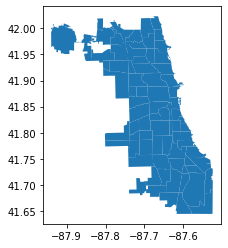

In [42]:
communities_gdf.plot()

<AxesSubplot:>

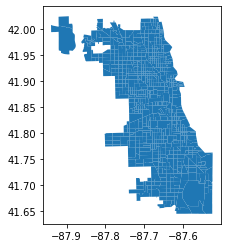

In [43]:
census.plot()

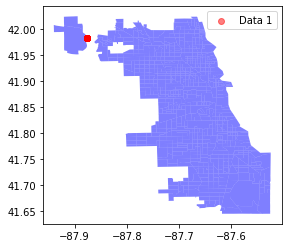

In [44]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the first GeoDataFrame
census.plot(ax=ax, color='blue', alpha=0.5)

# Plot the second GeoDataFrame
unmatchedp.plot(ax=ax, color='red', alpha=0.5)

# Add a legend
ax.legend(['Data 1', 'Data 2'])

# Show the plot
plt.show()

In [52]:
df.memory_usage()

Index                         176548264
Trip Start Timestamp           41281920
Trip End Timestamp             41281920
Trip Seconds                   41281920
Trip Miles                     41281920
Fare                           41281920
Tips                           41281920
Tolls                          41281920
Extras                         41281920
Payment Type                   41281920
Company                        41281920
Pickup Centroid Latitude       41281920
Pickup Centroid Longitude      41281920
Dropoff Centroid Latitude      41281920
Dropoff Centroid Longitude     41281920
new_TaxiID                     41281920
Pickup Census Tract            41281920
Dropoff Census Tract           41281920
Pickup Community Area          41281920
Dropoff Community Area         41281920
Trips Total                    41281920
date                           41281920
hour                           41281920
day                            41281920
weekday                        41281920


In [53]:
176548264+41281920*27

1291160104

In [54]:
41281920*27

1114611840

In [55]:
1114611840+176548264

1291160104

In [45]:
H3_HEXAGON_RESOLUTION = 10

In [46]:
df["h3_hex_id_start"] = df.apply(lambda row: h3.geo_to_h3(row["Pickup Centroid Latitude"], row["Pickup Centroid Longitude"], H3_HEXAGON_RESOLUTION) if (row['Pickup Centroid Latitude'] and row['Pickup Centroid Longitude']) else 0, axis=1)
# trips["h3_hex_id_end"] = trips.apply(lambda row: h3.geo_to_h3(row["latitude_start"], row["longitude_end"], H3_HEXAGON_RESOLUTION) if (row['latitude_end'] and row['longitude_end']) else 0, axis=1)

trips_starts = pd.DataFrame()
trips_starts = df.groupby('h3_hex_id_start').count()['dur_min'].reset_index().rename(columns={'dur_min': 'count'})
trips_starts['geometry'] = trips_starts.apply(lambda x: Polygon(h3.h3_to_geo_boundary(x["h3_hex_id_start"], geo_json=True)), axis=1)

trips_starts_geo = gpd.GeoDataFrame(trips_starts, geometry=trips_starts['geometry'], crs='EPSG:4326')

In [47]:
trips_starts

,h3_hex_id_start,count,geometry
0,8a266419150ffff,27,"POLYGON ((-87.54161991284569 41.6644311427171,..."
1,8a2664194927fff,35,POLYGON ((-87.53544220780273 41.70818579092663...
2,8a2664194b5ffff,1,"POLYGON ((-87.5296680786472 41.69656863022677,..."
3,8a2664196047fff,307,"POLYGON ((-87.5707782197838 41.69129411451065,..."
4,8a2664520ad7fff,22987,"POLYGON ((-87.7701858852066 41.79309489787873,..."
...,...,...,...
399,8a27593698cffff,1502,POLYGON ((-87.80512803606737 41.98593406818941...
400,8a275936b75ffff,1,POLYGON ((-87.84424014893501 41.97225455064234...
401,8a275936bb2ffff,1,POLYGON ((-87.82653040550153 41.98077503058481...
402,8a275936bc4ffff,40,POLYGON ((-87.84194141762202 41.98315913542661...


<AxesSubplot:>

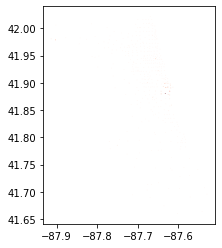

In [48]:
trips_starts_geo.plot(column='count', cmap='Reds')

In [49]:
dfbare=df[df['Dropoff Census Tract'].notna()]